In [251]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score
import math
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## 1. Using the sales.csv Download sales.csv, write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.

### reading data from csv and getting simple insights

In [15]:
sales = pd.read_csv("sales.csv")
sales

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74
...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49
2996,3996,0.28,0.00,0.04,0.49
2997,3997,0.00,0.49,0.00,0.49
2998,3998,0.07,0.09,0.07,0.49


In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [76]:
sales.columns

Index(['Unnamed: 0', 'area1_sales', 'area2_sales', 'area3_sales',
       'total_sales'],
      dtype='object')

### Checking and Dropping null values from the Dataframe

In [77]:
### No na values
sales.isnull().sum()

Unnamed: 0     0
area1_sales    0
area2_sales    0
area3_sales    0
total_sales    0
dtype: int64

### Create X and Y variable

In [78]:
Y = sales.iloc[:,-1]
X = sales.iloc[:,1:-1]

In [79]:
### create interactions 
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_with_interaction = poly.fit_transform(X)

In [80]:
### turn interaction array into dataframe
X_with_interaction = pd.DataFrame(X_with_interaction , columns = X.columns.to_list() +\
                  ['area1 * area2' , 'area1 * area3' , 'area2 * area3'])

### Splitting data into train and test subsets

In [81]:
x_train , x_test , y_train , y_test = train_test_split(X_with_interaction ,Y,\
                                 test_size = 0.2 , random_state = 42)

### Scaling data using Robust Scalar

In [82]:
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.fit_transform(x_test)

### Linear Regression 

In [98]:
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [101]:
print(reg.score(x_test,y_test))
print(reg.intercept_)
print(reg.coef_)

0.41847461223260074
0.7487430366362523
[0.27122599 0.0507416  0.0977987  0.00492406 0.03971215 0.00421028]


### Result from sklearn package

In [102]:
result_df = pd.DataFrame(reg.coef_ , X_with_interaction.columns[:] , columns = ['Coefficient'])
result_df

,Coefficient
area1_sales,0.271226
area2_sales,0.050742
area3_sales,0.097799
area1 * area2,0.004924
area1 * area3,0.039712
area2 * area3,0.004210


$ Total Sales = 0.2712 * area1\_sales + 0.0507 * area2\_sales + 0.0977 * area3\_sales + 0.0049 * area1\_sales * area2\_sales + 0.0397 * area1\_sales * area3\_sales + 0.0042 * area2\_sales * area3\_sales + 0.7487 $

### 2. Develop a full Logistic Regression Model using customer.csv Download customer.csv to predict whether the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [90]:
customer = pd.read_csv("customer.csv")

In [92]:
customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [93]:
### create dummy variable for "Gender"
customer = pd.get_dummies(customer , columns = ['Gender'] , drop_first = True)

In [109]:
X = customer[['Age' , 'EstimatedSalary' , 'Gender_Male']]
Y = customer['Purchased']

In [117]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_with_interaction = poly.fit_transform(X)

### turn interaction array into dataframe
X_with_interaction = pd.DataFrame(X_with_interaction , columns = X.columns.to_list() + ['Age * EstimatedSalary' , 'Age * Gender_Male' , 'EstimatedSalary * Gender_Male'])


### Full model

In [187]:
full_logr = LogisticRegression()
full_logr.fit(X_with_interaction , Y)

print('intercept : ' , full_logr.intercept_[0])
print('score : ' , full_logr.score(X_with_interaction , Y))

pd.DataFrame({'coeff' : full_logr.coef_[0]} ,\
             index = X_with_interaction.columns)

intercept :  -2.8215326738650626e-09
score :  0.8175


,coeff
Age,-5.347235e-08
EstimatedSalary,-7.873005e-05
Gender_Male,-9.220766e-10
Age * EstimatedSalary,1.920021e-06
Age * Gender_Male,-8.952760e-09
EstimatedSalary * Gender_Male,9.371159e-07


### Test out all other possible models

In [ ]:
X_with_interaction['Y'] = Y

In [262]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4711
Time:                        21:52:27   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Age                 0.2370      0.026      8.984      0.000       0.185       0.289
EstimatedSalary  3.644e-05   5.47e-06      6.659      0.000    2.57e-05    4.72e-05
Gender_Male         0.3338      0.305      1.094      0.274      -0.264       0.932
===================================================================================
"""

In [263]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Age * EstimatedSalary' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.266962
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5905
Time:                        21:52:27   Log-Likelihood:                -106.78
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.843e-66
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -36.1099      4.419     -8.172      0.000     -44.770     -27.449
Age                     0.7750      0.098      7.933      0.000       0.584       0.967
EstimatedSalary         0.0003   4.23e-05      7.098      0.000       0.000       0.000
Age:EstimatedSalary -6.146e-06   9.21e-07     -6.670      0.000   -7.95e-06   -4.34e-06
=======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [264]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male + Age * Gender_Male + Gender_Male * EstimatedSalary' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.342327
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4749
Time:                        21:52:27   Log-Likelihood:                -136.93
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.703e-51
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -11.2916      1.596     -7.073      0.000     -14.420      -8.163
Age                             0.2096      0.031      6.689      0.000       0.148       0.271
EstimatedSalary              3.148e-05   6.75e-06      4.665      0.000    1.83e-05    4.47e-05
Gender_Male                    -3.4790      2.823     -1.232      0.218      -9.011       2.053
Age:Gender_Male                 0.0721      0.057      1.275      0.202      -0.039       0.183
Gender_Male:EstimatedSalary  1.267e-05   1.14e-05      1.114      0.265   -9.62e-06     3.5e-05
===============================================================================================
"""

In [265]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male + Age * EstimatedSalary + Gender_Male * EstimatedSalary' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.263191
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5963
Time:                        21:52:27   Log-Likelihood:                -105.28
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 4.276e-65
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -37.6715      4.669     -8.069      0.000     -46.822     -28.521
Age                             0.8016      0.102      7.866      0.000       0.602       1.001
EstimatedSalary                 0.0003   4.42e-05      7.035      0.000       0.000       0.000
Gender_Male                     0.5679      0.912      0.622      0.534      -1.221       2.356
Age:EstimatedSalary         -6.362e-06   9.57e-07     -6.645      0.000   -8.24e-06   -4.49e-06
Gender_Male:EstimatedSalary  6.597e-07   1.06e-05      0.062      0.950      -2e-05    2.14e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [266]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male + Age * EstimatedSalary + Age * Gender_Male' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.262911
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5967
Time:                        21:52:27   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.827e-65
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -37.1082      4.790     -7.747      0.000     -46.496     -27.720
Age                     0.7879      0.105      7.491      0.000       0.582       0.994
EstimatedSalary         0.0003   4.42e-05      7.025      0.000       0.000       0.000
Gender_Male            -0.4415      2.260     -0.195      0.845      -4.872       3.989
Age:EstimatedSalary -6.339e-06    9.6e-07     -6.602      0.000   -8.22e-06   -4.46e-06
Age:Gender_Male         0.0253      0.053      0.475      0.635      -0.079       0.130
=======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [261]:
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male + Age * EstimatedSalary + Age * Gender_Male + Gender_Male * EstimatedSalary' , data = X_with_interaction).fit()
bm.summary()

Optimization terminated successfully.
         Current function value: 0.262888
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5968
Time:                        21:49:20   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.155e-64
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -37.0373      4.828     -7.671      0.000     -46.501     -27.574
Age                             0.7875      0.106      7.463      0.000       0.581       0.994
EstimatedSalary                 0.0003   4.46e-05      6.953      0.000       0.000       0.000
Gender_Male                    -0.6031      2.572     -0.234      0.815      -5.644       4.438
Age:EstimatedSalary         -6.337e-06   9.62e-07     -6.585      0.000   -8.22e-06   -4.45e-06
Age:Gender_Male                 0.0264      0.054      0.488      0.625      -0.080       0.132
Gender_Male:EstimatedSalary  1.443e-06   1.08e-05      0.134      0.894   -1.97e-05    2.26e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

base on the above summaries, model containing 

1. 'Age'
2. 'EstimatedSalary' 
3. 'Gender_Male' 
4. 'Age * EstimatedSalary'
5. 'Age * Gender_Male'
6. 'Gender_Male * EstimatedSalary'

is the best model with its equals to Pseudo R-squ.:	0.5968

### 3 . For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 and give your interpretation of the model’s coefficients (For example, what effect does a positive or negative coefficient have on the model and so on).

In [267]:
X_with_interaction['Y'] = Y
### Best model
bm = smf.logit(formula = 'Y ~ Age + EstimatedSalary + Gender_Male + Age * EstimatedSalary + Age * Gender_Male + Gender_Male * EstimatedSalary' , data = X_with_interaction).fit()

bm.summary()

Optimization terminated successfully.
         Current function value: 0.262888
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5968
Time:                        21:57:08   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.155e-64
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -37.0373      4.828     -7.671      0.000     -46.501     -27.574
Age                             0.7875      0.106      7.463      0.000       0.581       0.994
EstimatedSalary                 0.0003   4.46e-05      6.953      0.000       0.000       0.000
Gender_Male                    -0.6031      2.572     -0.234      0.815      -5.644       4.438
Age:EstimatedSalary         -6.337e-06   9.62e-07     -6.585      0.000   -8.22e-06   -4.45e-06
Age:Gender_Male                 0.0264      0.054      0.488      0.625      -0.080       0.132
Gender_Male:EstimatedSalary  1.443e-06   1.08e-05      0.134      0.894   -1.97e-05    2.26e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [268]:
print("Age : " , math.exp(0.8014))
print("Estimated Salary : " , math.exp(0.0003))
print("Gender_male : " , math.exp(0.6202))
print("Age x EstimatedSalary : " , math.exp(-6.36e-06))
print("Gender_Male x EstimatedSalary : " , math.exp(1.443e-06))
print("Age x Gender_Male : " , math.exp(0.0264))

Age :  2.2286588678406374
Estimated Salary :  1.0003000450045003
Gender_male :  1.8592998646357508
Age x EstimatedSalary :  0.9999936400202247
Gender_Male x EstimatedSalary :  1.000001443001041
Age x Gender_Male :  1.026751566971056


In sample R-square = 0.5963.

Coefficient interpretation:

1. Age : when age increase by 1, the probability of the customer purchasing a product increase by 1.2286 times

2. Estimated Salary increase by 1, the probability of the customer purchasing a product increase by 0.0003 times

3. Gender_Male : when the customer gender is "Male", the probability of the customer purchasing a product increase by 0.8592 times

4. Age x Estimated_Salary interaction: when Age increase by 1, the probability of customer purchasing a product decrease by 0.0000064 times; when Estimated Salary increase by 1, the probability of customer purchasing a product decrease by by 0.0000064 times as well.

5. Gender_Male x Estimated_Salary interaction: when Age increase by 1, the probability of customer purchasing a product increase by 0000014 times; when Estimated Salary increase by 1, the probability of customer purchasing a product increase by by 0000014 times as well.

6. Gender_Male x Age interaction: when Age increase by 1, the probability of customer purchasing a product increase by 0.02675 times; when Estimated Salary increase by 1, the probability of customer purchasing a product increase by by 0.02675 times as well.

### 4. Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

I think accuracy is probably not the best measurement here, becasue the number of "purchased" and "not purchased" is not balanced (we have many more not purchased customer in the data set), from this point of view, the machine can achieve a pretty good accuracy rate only by categorizing every customer to "not purchased".

In [249]:
customer.groupby('Purchased').count()

,User ID,Age,EstimatedSalary,Gender_Male
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


### 5. Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 


/Users/huangjien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/factorplots.py:130: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (values, group) in enumerate(plot_data.groupby(['trace'])):


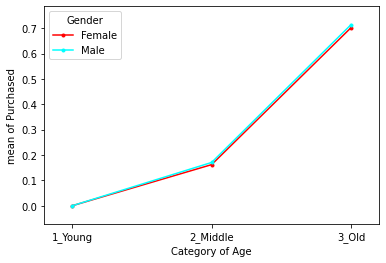

In [269]:
### categorized numerical ages into three different groups
def age_category(df):
    if df["Age"] <= 20:
        return "1_Young"
    elif df["Age"] > 40:
        return "3_Old"
    else:
        return "2_Middle"

### apply function
customer["age_category"] = customer.apply(age_category , axis=1)

### plot
gend = customer.Gender
age_cato = customer.age_category
Y = customer.Purchased
plot = interaction_plot(x = age_cato, trace = gend, response = Y , xlabel = "Category of Age")
plt.show()


### 6. The following plots show effect of Income and Change in savings on Likelihood of buying a house. Observe the three plots (a, b, c) shown and answer the following questions for each plot:
### I. Should the regression equation include the interaction terms (interaction between Income and Average Savings) or not?
### II. Give your reasoning as to why or why shouldn’t they be included.


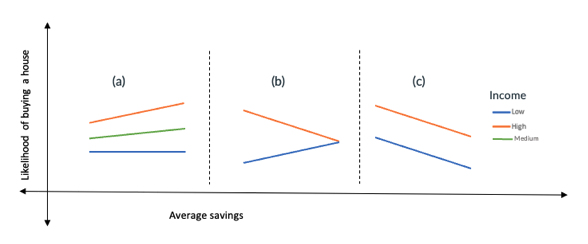

Answer 1:

"Yes" for (a) and (b)

"No" for (c)

Answer 2:

for (a) and (b), we should include the interaction terms, because the slope of each group differs with the increment of average savings, whereas for (c), the two slopes are parallel, which means that including interaction term will not help on prediction.
